In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
h5 = '../cerberus_annot.h5'
ab = '../../talon/human_talon_abundance.tsv'
filt_ab = '../cerberus_filtered_abundance.tsv'
obs_col = 'sample'
min_tpm = 1
major_set = 'isos_sample_gene_90.tsv'
swan_file = 'swan.p'

In [3]:
mane_file = o = '/Users/fairliereese/mortazavi_lab/data/rnawg/refs/v40_gene_metadata.tsv'

In [4]:
def get_exp_mane_genes():
    # get list of gene inds that are >=1 tpm and 
    # had a mane iso
    inds = pd.read_csv('temp_gids_1_tpm.tsv', sep='\t')
    inds = inds.gids.tolist()

    mane = pd.read_csv(mane_file, sep='\t')
    mane = mane.loc[mane.MANE_Select == True]
    mane['gid'] = cerberus.get_stable_gid(mane, col='gid')
    mane = mane.gid.tolist()

    inds = list(set(inds)&(set(mane)))
    print(len(inds))
    
    return inds

In [5]:
def get_data(): 
    
    inds = get_exp_mane_genes()
    
    obs_col = 'sample'
    sg = swan.read('swan.p')
    gene_subset=inds
    
    return sg, obs_col, gene_subset 

In [6]:
# # get list of gene inds that are >=1 tpm and 
# # had a mane iso
# inds = pd.read_csv('temp_gids_1_tpm.tsv', sep='\t')
# inds = inds.gids.tolist()

# mane = pd.read_csv(mane_file, sep='\t')
# mane = mane.loc[mane.MANE_Select == True]
# mane['gid'] = cerberus.get_stable_gid(mane, col='gid')
# mane = mane.gid.tolist()

# inds = list(set(inds)&(set(mane)))
# print(len(inds))

In [7]:
# obs_col = 'sample'
# sg = swan.read('swan.p')
# gene_subset=inds

In [39]:
sg, obs_col, gene_subset = get_data()
obs_col = 'sample'
min_tpm = 1
ca = cerberus.read(h5)
df = get_major_feats(sg, obs_col=obs_col, gene_subset=gene_subset, min_tpm=min_tpm)
df.to_csv('major_feats.tsv', sep='\t', index=False)

17629
Read in graph from swan.p



83.10% (14099/16966) genes with >= 1 sample where the major triplet is not MANE

51.91% (8807/16966) genes with >= 1 sample where the major tss is not MANE

65.05% (11037/16966) genes with >= 1 sample where the major ic is not MANE

60.75% (10306/16966) genes with >= 1 sample where the major tes is not MANE


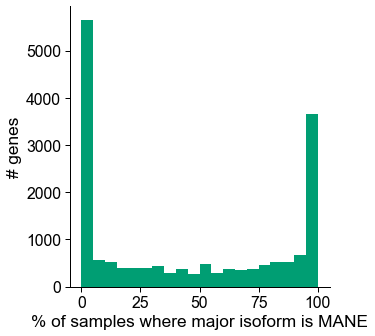

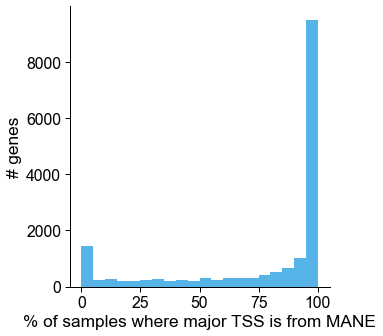

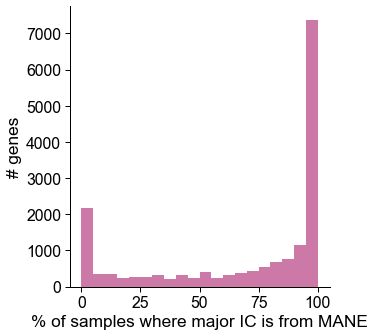

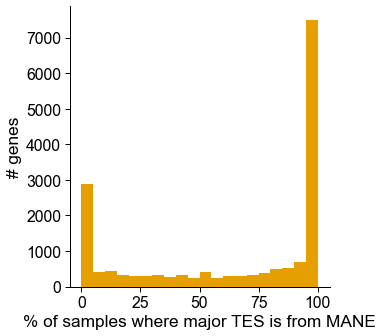

In [32]:
df = plot_major_principal_feat_counts(sg, opref='figures/',
                                      obs_col=obs_col,
                                      gene_subset=gene_subset)

In [33]:
df.to_csv('major_principal_feat_counts.tsv', sep='\t')

In [34]:
df.head()

,gname,gid_stable,tss,ic,tes,triplet,not_tss,not_ic,not_tes,not_triplet,n_samples,perc_triplet,perc_tss,perc_ic,perc_tes
0,A1BG,ENSG00000121410,2,2,24,0,42,42,20,44,44,0.000000,4.545455,4.545455,54.545455
1,A1CF,ENSG00000148584,10,0,1,0,0,10,9,10,10,0.000000,100.000000,0.000000,10.000000
2,A2M,ENSG00000175899,25,32,32,24,7,0,0,8,32,75.000000,78.125000,100.000000,100.000000
3,A2ML1,ENSG00000166535,0,0,0,0,3,3,3,3,3,0.000000,0.000000,0.000000,0.000000
4,A4GALT,ENSG00000128274,38,37,38,37,0,1,0,1,38,97.368421,100.000000,97.368421,100.000000


In [35]:
# what % of genes is MANE not used in all samples?
feats = ['triplet', 'tss', 'ic', 'tes']
for feat in feats:
    col = 'perc_{}'.format(feat)
    n = len(df.index)
    n_num = len(df.loc[df[col] != 100].index)
    print('{:.2f}% of genes ({}/{}) have >1 sample where most highly expressed {} is not from MANE'.format((n_num/n)*100,n_num,n,feat))

83.10% of genes (14099/16966) have >1 sample where most highly expressed triplet is not from MANE
51.91% of genes (8807/16966) have >1 sample where most highly expressed tss is not from MANE
65.05% of genes (11037/16966) have >1 sample where most highly expressed ic is not from MANE
60.75% of genes (10306/16966) have >1 sample where most highly expressed tes is not from MANE


In [37]:
temp = count_major_principal_feats(sg, obs_col=obs_col, gene_subset=gene_subset)


83.10% (14099/16966) genes with >= 1 sample where the major triplet is not MANE

51.91% (8807/16966) genes with >= 1 sample where the major tss is not MANE

65.05% (11037/16966) genes with >= 1 sample where the major ic is not MANE

60.75% (10306/16966) genes with >= 1 sample where the major tes is not MANE


In [38]:
get_major_principal_feats(sg, obs_col=obs_col, gene_subset=gene_subset)

16966
15120
ic
89.12% of genes have >=1 sample where major ic is MANE

16966
15696
tss
92.51% of genes have >=1 sample where major tss is MANE

16966
14585
tes
85.97% of genes have >=1 sample where major tes is MANE

16966
11928
triplet
70.31% of genes have >=1 sample where major triplet is MANE



,gname,gid_stable,tss,ic,tes,triplet
0,A1BG,ENSG00000121410,True,True,True,False
1,A1CF,ENSG00000148584,True,False,True,False
2,A2M,ENSG00000175899,True,True,True,True
3,A2ML1,ENSG00000166535,False,False,False,False
4,A4GALT,ENSG00000128274,True,True,True,True
...,...,...,...,...,...,...
16961,ZYG11A,ENSG00000203995,True,True,True,True
16962,ZYG11B,ENSG00000162378,True,True,True,True
16963,ZYX,ENSG00000159840,True,True,True,True
16964,ZZEF1,ENSG00000074755,True,False,False,False


In [42]:
def uses_principal_feat(x):
    """
    Agg function to determine if individual feats
    (tss, ic, tes) use the principal version of that 
    feature
    """
    return '1' in x.unique()

def uses_principal_iso(x):
    """
    Agg function to determine if the isoform triplet
    is the principal version of that gene
    """
    return '1,1,1' in x.unique()

def count_major_principal_feats(sg, **kwargs):
    """
    Count the number of samples that the major isoform
    is the principal isoform and vice versa. Do the same
    for individual features as well.
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
            
    Returns:
        df (pandas DataFrame): DF with # samples per gene 
            that use the principal feature as their major
            feature / iso
    """

    df = get_major_feats(sg, **kwargs)
    # df = major_df.copy(deep=True)

    # drop unnecessary columns
    temp = df.copy(deep=True)
    drop_cols = [c for c in temp.columns if 'pi' in c]
    drop_cols += [c for c in temp.columns if '_id' in c]
    drop_cols += ['tid', 'gid']
    temp.drop(drop_cols, axis=1, inplace=True)

    temp = temp.groupby([obs_col, 'gname',
                        'gid_stable'],
                        observed=True).agg({'tss': uses_principal_feat,
                                            'ic': uses_principal_feat,
                                            'tes': uses_principal_feat,
                                            'triplet': uses_principal_iso}).reset_index()

    # convert from detection bool to int so we can sum up
    # also add the opposiite number
    for feat in ['tss', 'ic', 'tes', 'triplet']:
        col = 'not_{}'.format(feat)
        temp[feat] = temp[feat].astype(int)
        temp[col] = (temp[feat] == False).astype(int)

    # count n samples where major != principal and vice versa
    temp = temp.groupby(['gname', 'gid_stable']).sum().reset_index()

    # total number of samples that this gene is expressed / 
    # has a complete isoform in 
    temp['n_samples'] = temp.triplet+temp.not_triplet

    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'not_{}'.format(feat)
        n_genes = len(temp.gid_stable.unique())
        n_num = len(temp.loc[temp[col] >= 1].index)
        print()
        print('{:.2f}% ({}/{}) genes with >= 1 sample where the major {} is not MANE'.format((n_num/n_genes)*100, n_num, n_genes, feat)) 

    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'perc_{}'.format(feat)
        temp[col] = (temp[feat]/temp.n_samples)*100

    return temp

def get_major_principal_feats(sg, **kwargs):
    """
    Determine how many genes have at least one sample where
    the features and full-length isoform is the principal isoform
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                    abundance data added   
                    
    Returns:
        df (pandas DataFrame): DF w/ boolean columns for 
            whether or not there's at least one sample
            where the major feat / isoform is the principal one
    """
    df = get_major_feats(sg, **kwargs)
    # df = major_df.copy(deep=True)

    # add feature numbers
    for feat in ['tss', 'ic', 'tes']:
        id_col = '{}_id'.format(feat)
        df[feat] = df[id_col].str.split('_', expand=True)[1]

    # add triplet
    df['triplet'] = df.tid.str.split('[', expand=True)[1].str.split(']', expand=True)[0]


    # remove unnecessary columns and determine which genes
    # have at least one sample who's major iso uses the principal
    # of each feature
    temp = df.copy(deep=True)
    drop_cols = [c for c in temp.columns if 'pi' in c]
    drop_cols += [c for c in temp.columns if '_id' in c]
    drop_cols += ['tid', 'gid']
    temp.drop(drop_cols, axis=1, inplace=True)

    temp = temp.groupby(['gname',
                         'gid_stable']).agg({'tss': uses_principal_feat,
                                             'ic': uses_principal_feat,
                                             'tes': uses_principal_feat,
                                             'triplet': uses_principal_iso}).reset_index()

    # output
    for feat in ['ic', 'tss', 'tes', 'triplet']:
        n_genes = len(temp.gid_stable.unique().tolist())
        n_major = len(temp.loc[temp[feat] == True].index)
        print(n_genes)
        print(n_major)
        print(feat)
        print('{:.2f}% of genes have >=1 sample where major {} is MANE'.format((n_major/n_genes)*100, feat))
        print()

    return temp

def plot_major_principal_feat_counts(sg, opref='figures/', **kwargs):
    """
    Plot a histogram of the number of datasets where the major isoform
    is the principal isoform.
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                abundance data added
    
    Returns:
        temp (pandas DataFrame): Output from `count_major_principal_feats`.
    """
    temp = count_major_principal_feats(sg, **kwargs)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42
    sns.set_context('paper', font_scale=1.8)
    c_dict, order = get_feat_triplet_colors()  
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'perc_{}'.format(feat)
        ax = sns.displot(data=temp,
                         x=col,
                         linewidth=0, 
                         color=c_dict[feat],
                         binwidth=5,
                         alpha=1)
        ylabel = '# genes'
        if feat in ['tss', 'ic', 'tes']: 
            xlabel = '% of samples where major {} is from MANE'.format(feat.upper())
        else:
            xlabel = '% of samples where major isoform is MANE'
            
        ax.set(ylabel=ylabel, xlabel=xlabel)

        fname = '{}/MANE_vs_major_{}_hist.pdf'.format(opref, feat)
        plt.savefig(fname, dpi=800, bbox_inches='tight')
        
    return temp


def compute_feat_tpm(adata, obs_col, feat, how, min_tpm=None):
    tpm_df = swan.calc_tpm(adata, obs_col=obs_col, how=how)
    tpm_df = tpm_df.sparse.to_dense()
    tpm_df = tpm_df.T
    tpm_df = tpm_df.melt(var_name=obs_col, value_name='tpm', ignore_index=False)
    tpm_df.reset_index(inplace=True)
    tpm_df.rename({'index': id_col}, axis=1, inplace=True)
    if min_tpm:
        tpm_df = tpm_df.loc[tpm_df.tpm >= min_tpm]
    tpm_df.rename({'tpm': '{}_tpm'.format(feat)}, axis=1, inplace=True)
    return tpm_df

def get_major_feats(sg, obs_col='sample', gene_subset=None, min_tpm=None):
    """
    Determine what the major isoform, tss, tes, ic is in each grouping
    for each gene 
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
        obs_col (str): Column in `sg.adata.obs` to group
            datasets by 
        gene_subset (list of str or None): If not None, 
            list of stable gene ids to subset on 
            
    Returns:
        df (pandas DataFrame): DF where each row is the major 
            isoform in each expressed gene / sample combination
    """
    # get the major tss, ic, tes, and isoform from each sample
    adatas = [sg.adata, sg.tss_adata, sg.ic_adata, sg.tes_adata]
    t_dfs = [sg.t_df, sg.tss_adata.var, sg.ic_adata.var, sg.tes_adata.var]
    feats = ['triplet', 'tss', 'ic', 'tes']
    id_cols = {'triplet': 'tid', 'tss': 'tss_id', 'ic': 'ic_id', 'tes': 'tes_id'}
    major_df = pd.DataFrame()

    for feat, adata, t_df in zip(feats, adatas, t_dfs):

        # get pi value for each feature in the specified gb category
        df, _ = swan.calc_pi(adata, t_df, obs_col=obs_col)
        df = df.sparse.to_dense()
        df = df.transpose()

        # merge with gene info
        id_col = id_cols[feat]
        t_df = t_df.copy(deep=True)
        if feat == 'triplet':
            drop = True
        else:
            drop = False
        t_df.reset_index(drop=drop,inplace=True)
        t_df = t_df[[id_col, 'gid']]
        df = df.merge(t_df, how='inner', on=id_col)
        df.set_index([id_col, 'gid'], inplace=True)

        # pivot and coerce into lengthwise format
        df = df.melt(ignore_index=False, value_name='pi', var_name=obs_col)
        df = df.dropna(subset=['pi'])
        df.reset_index(inplace=True)

        # enforce min tpm for isoforms
        if min_tpm and feat == 'triplet':
            tpm_df = compute_feat_tpm(adata, obs_col, feat, how='max', min_tpm=min_tpm)
            df = df.merge(tpm_df, how='inner', on=[id_col, 'sample'])
            df.drop('{}_tpm'.format(feat), axis=1, inplace=True)

        # merge in avg. tpm for each feat and enforce min
        tpm_df = compute_feat_tpm(adata, obs_col, feat, how='mean')
        df = df.merge(tpm_df, how='left', on=[id_col, 'sample'])

        # remove unexpressed isoforms
        df = df.loc[df.pi > 0]

        # limit to detected genes
        df['gid_stable'] = cerberus.get_stable_gid(df, 'gid')
        if gene_subset:
            df = df.loc[df.gid_stable.isin(gene_subset)]

        # sort by gene, sample, and pi value
        # dedupe across the gene and sample cols; take the top-expressed isoform
        df = df.sort_values(by=['gid', obs_col, 'pi', '{}_tpm'.format(feat)],
                            ascending=[False, False, False, False])

        df = df.drop_duplicates(subset=['gid', obs_col], keep='first')

        # rename some columns
        if feat == 'triplet': 
            df.rename({'pi': 'tid_pi'}, axis=1, inplace=True)
        else:
            pi_col = '{}_pi'.format(feat)
            df.rename({'pi': pi_col}, axis=1, inplace=True)

        # first entry
        if major_df.empty:
            major_df = df.copy(deep=True)
        else:
            major_df = major_df.merge(df, how='outer', on=['gid', 'sample', 'gid_stable'])        

    # add gene name
    g_df = sg.t_df[['gid', 'gname']].reset_index(drop=True).drop_duplicates()
    major_df = major_df.merge(g_df, how='left', on='gid')
    
    # add feature numbers
    for feat in ['tss', 'ic', 'tes']:
        id_col = '{}_id'.format(feat)
        major_df[feat] = major_df[id_col].str.split('_', expand=True)[1]

    # add triplet
    major_df['triplet'] = major_df.tid.str.split('[', expand=True)[1].str.split(']', expand=True)[0]

    return major_df


## Expression of MANE isos vs. principal isos

In [135]:
df = pd.read_csv('major_feats.tsv', sep='\t')

# remove nan principal iso entries
df = df.loc[~df.tid.isnull()]

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [136]:
def plot_mane_v_princ_tpm(temp, feat):
    temp['log_princ'] = np.log2(temp['{}_tpm_principal'.format(feat)]+1)
    temp['log_mane'] = np.log2(temp['{}_tpm_mane'.format(feat)]+1)

    lim_max = max(temp.log_princ.max(), temp.log_mane.max())
    xlim = ylim = (-2, lim_max)

    c_dict, order = get_feat_triplet_colors()  
    color = c_dict[feat]

    ax = sns.jointplot(data=temp, x='log_mane', y='log_princ', color=color, 
                       xlim=xlim, ylim=ylim)

    if feat == 'triplet':
        label = 'isoform'
    else:
        label = feat.upper()
    ylabel = 'log2(Principal {} TPM+1)'.format(label)
    xlabel = 'log2(MANE {} TPM+1)'.format(label)

    tick_range = range(0, int(lim_max+1), 5)
    ax.ax_joint.set_xticks(tick_range)
    ax.ax_joint.set_yticks(tick_range)
    ax.ax_joint.set(ylabel=ylabel, xlabel=xlabel)
    
    fname = 'figures/mane_vs_principal_{}_tpm.pdf'.format(feat)
    plt.savefig(fname, dpi=800, bbox_inches='tight')
    

triplet
11645950
701550
42.90% (123827/288644) of gene / sample combos have MANE expression where principal triplet is not MANE 
57.10% (164817/288644) of gene / sample combos have NO MANE expression where principal triplet is not MANE 

tss
3821850
810550
43.53% (38133/87601) of gene / sample combos have MANE expression where principal tss is not MANE 
56.47% (49468/87601) of gene / sample combos have NO MANE expression where principal tss is not MANE 

ic
7442850
797350
53.10% (73135/137742) of gene / sample combos have MANE expression where principal ic is not MANE 
46.90% (64607/137742) of gene / sample combos have NO MANE expression where principal ic is not MANE 

tes
4414450
801250
60.97% (120510/197643) of gene / sample combos have MANE expression where principal tes is not MANE 
39.03% (77133/197643) of gene / sample combos have NO MANE expression where principal tes is not MANE 



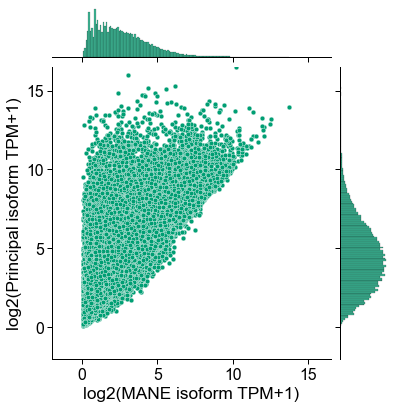

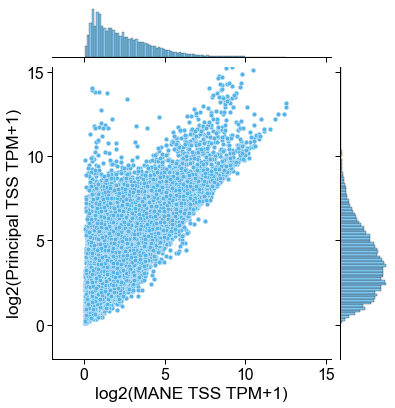

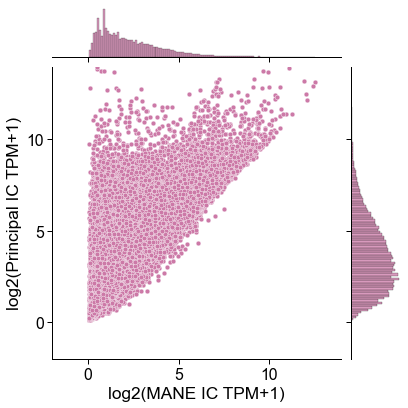

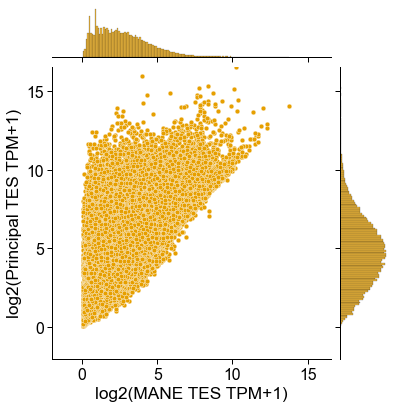

In [137]:
adatas = [sg.adata, sg.tss_adata, sg.ic_adata, sg.tes_adata]
t_dfs = [sg.t_df, sg.tss_adata.var, sg.ic_adata.var, sg.tes_adata.var]
feats = ['triplet', 'tss', 'ic', 'tes']
id_cols = {'triplet': 'tid', 'tss': 'tss_id', 'ic': 'ic_id', 'tes': 'tes_id'}
id_cols_2 = {'triplet': 'transcript_id', 'tss': 'tss_id', 'ic': 'ic_id', 'tes': 'tes_id'}
how = 'mean'

for feat, adata, t_df in zip(feats, adatas, t_dfs):
    print(feat)
    id_col = id_cols[feat]
    id_col_2 = id_cols_2[feat]
    tpm_df = compute_feat_tpm(adata, obs_col, feat, how, min_tpm=None)
    
    # get mane tids -- look at v40 metadata and cross ref. w/ cerberus
    # also grab their TPMs
    meta_df = pd.read_csv('../../../refs/v40_transcript_metadata.tsv', sep='\t')
    mane_tids = meta_df.loc[meta_df.MANE_Select].tid.tolist()
    mane_df = ca.t_map.copy(deep=True)
    mane_df = mane_df.loc[mane_df.source=='v40']
    mane_df = mane_df.loc[mane_df.original_transcript_id.isin(mane_tids)]
    mane_feats = mane_df[id_col_2].unique().tolist()
    mane_feats[:5]

    # limit tpm_df to just the mane features
    print(len(tpm_df.index))
    tpm_df = tpm_df.loc[tpm_df[id_col].isin(mane_feats)]
    print(len(tpm_df.index))

    # add the gene id 
    if feat == 'triplet':
        pat = '['
    else:
        pat = '_'
    tpm_df['gid'] = tpm_df[id_col].str.split(pat, expand=True)[0]
    tpm_df.head()

    # merge in TPM of MANE features
    df = df.merge(tpm_df, how='left', on=['gid', obs_col], suffixes=('_principal', '_mane'))
    # fill nans for tpm w/ 0
    df['{}_tpm_mane'.format(feat)].fillna(0, inplace=True)

    prin_mane_col = '{}_principal_is_mane'.format(feat)
    df[prin_mane_col] = df[id_col+'_principal']==df[id_col+'_mane']

    # when is the mane isoform not the principal isoform, but mane is still expressed?
    temp = df.loc[df[prin_mane_col] == False]
    n = len(temp.index)
    temp = temp.loc[temp['{}_tpm_mane'.format(feat)]>0]
    n_num = len(temp.index)
    print('{:.2f}% ({}/{}) of gene / sample combos have MANE expression where principal {} is not MANE '.format((n_num/n)*100, n_num, n, feat))
    plot_mane_v_princ_tpm(temp, feat)
    
    # when is the mane isoform not the principal isoform, and mane is NOT expressed?
    temp = df.loc[df[prin_mane_col] == False]
    n = len(temp.index)
    temp = temp.loc[temp['{}_tpm_mane'.format(feat)]==0]
    n_num = len(temp.index)
    print('{:.2f}% ({}/{}) of gene / sample combos have NO MANE expression where principal {} is not MANE '.format((n_num/n)*100, n_num, n, feat))

    print()

In [105]:
df.head()

,tid_principal,gid,sample,tid_pi,triplet_tpm_principal,gid_stable,tss_id_principal,tss_pi,tss_tpm_principal,ic_id_principal,...,triplet_principal_is_mane,tss_id_mane,tss_tpm_mane,tss_principal_is_mane,ic_id_mane,ic_tpm_mane,ic_principal_is_mane,tes_id_mane,tes_tpm_mane,tes_principal_is_mane
0,"ENSG00000285043[5,15,1]",ENSG00000285043,wtc11,95.81529,286.627000,ENSG00000285043,ENSG00000285043_5,96.392494,288.419980,ENSG00000285043_15,...,False,ENSG00000285043_1,1.529427,False,ENSG00000285043_1,1.377200,False,ENSG00000285043_1,298.055237,True
1,"ENSG00000285043[5,15,1]",ENSG00000285043,vessels,92.85714,245.049710,ENSG00000285043,ENSG00000285043_5,93.095240,245.509500,ENSG00000285043_15,...,False,ENSG00000285043_1,4.104353,False,ENSG00000285043_1,3.902817,False,ENSG00000285043_1,265.761627,True
2,"ENSG00000285043[5,15,1]",ENSG00000285043,pgp1_excite_neuron,81.53846,50.147280,ENSG00000285043,ENSG00000285043_5,83.076930,51.165703,ENSG00000285043_15,...,False,ENSG00000285043_1,5.700274,False,ENSG00000285043_1,3.055270,False,ENSG00000285043_1,61.547829,True
3,"ENSG00000285043[5,15,1]",ENSG00000285043,pgp1_endo,80.00000,54.699585,ENSG00000285043,ENSG00000285043_5,80.000000,54.699585,ENSG00000285043_15,...,False,ENSG00000285043_1,0.861797,False,ENSG00000285043_1,0.861797,False,ENSG00000285043_1,67.684586,True
4,"ENSG00000285043[5,15,1]",ENSG00000285043,pgp1_astro,85.31073,155.122470,ENSG00000285043,ENSG00000285043_5,85.875710,155.955410,ENSG00000285043_15,...,False,ENSG00000285043_1,5.338630,False,ENSG00000285043_1,3.672730,False,ENSG00000285043_1,180.300812,True


In [117]:
temp.loc[temp.tes_tpm_mane == 0].head()
df['{}_tpm_mane'.format(feat)].fillna(0, inplace=True)

In [ ]:
def plot_mane_v_princ_tpm(temp, feat):
    temp['log_princ'] = np.log2(temp['{}_tpm_principal'.format(feat)]+1)
    temp['log_mane'] = np.log2(temp['{}_tpm_mane'.format(feat)]+1)

    lim_max = max(temp.log_princ.max(), temp.log_mane.max())
    xlim = ylim = (-2, lim_max)

    c_dict, order = get_feat_triplet_colors()  
    color = c_dict[feat]

    ax = sns.jointplot(data=temp, x='log_mane', y='log_princ', color=color, 
                       xlim=xlim, ylim=ylim)

    if feat == 'triplet':
        label = 'isoform'
    else:
        label = feat.upper()
    ylabel = 'log2(Principal {} TPM+1)'.format(label)
    xlabel = 'log2(MANE {} TPM+1)'.format(label)

    tick_range = range(0, int(lim_max+1), 5)
    ax.ax_joint.set_xticks(tick_range)
    ax.ax_joint.set_yticks(tick_range)
    ax.ax_joint.set(ylabel=ylabel, xlabel=xlabel)
    
    fname = 'figures/mane_vs_principal_{}_tpm.pdf'.format(feat)
    plt.savefig(fname, dpi=800, bbox_inches='tight')
    

[Text(11.075000000000003, 0.5, 'log2(Principal TES TPM+1)'),
 Text(0.5, 26.699999999999946, 'log2(MANE TES TPM+1)')]

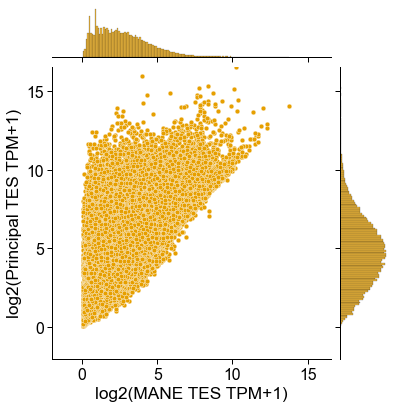

In [134]:
# for gene / sample combinations, if the mane feat. is not the principal feat
# but is still expressed, plot the expression of mane vs. principal
temp = df.loc[df[prin_mane_col] == False]
temp = temp.loc[temp['{}_tpm_mane'.format(feat)]>0]
temp['log_princ'] = np.log2(temp['{}_tpm_principal'.format(feat)]+1)
temp['log_mane'] = np.log2(temp['{}_tpm_mane'.format(feat)]+1)

lim_max = max(temp.log_princ.max(), temp.log_mane.max())
xlim = ylim = (-2, lim_max)

c_dict, order = get_feat_triplet_colors()  
color = c_dict[feat]

ax = sns.jointplot(data=temp, x='log_mane', y='log_princ', color=color, 
                   xlim=xlim, ylim=ylim)

if feat == 'triplet':
    label = 'isoform'
else:
    label = feat.upper()
ylabel = 'log2(Principal {} TPM+1)'.format(label)
xlabel = 'log2(MANE {} TPM+1)'.format(label)

tick_range = range(0, int(lim_max+1), 5)
ax.ax_joint.set_xticks(tick_range)
ax.ax_joint.set_yticks(tick_range)
ax.ax_joint.set(ylabel=ylabel, xlabel=xlabel)



In [114]:
temp.log_princ.max()

16.54641551124005

In [115]:
temp.log_mane.max()

13.751107

In [108]:
prin_mane_col

'tes_principal_is_mane'